# Time series of High F_S Cutouts

In [1]:
# imoprts
import os
import numpy as np
from importlib import reload

import xmitgcm
import xmitgcm.llcreader as llcreader

import pandas
import xarray

from matplotlib import pyplot as plt
import seaborn as sns

from gsw import density

from ulmo import io as ulmo_io 
from ulmo.llc import plotting as llc_plotting
from ulmo.llc import io as llc_io
from ulmo.plotting import plotting
from ulmo.llc.slurp import write_xr
from ulmo.utils import image_utils

In [2]:
ref_rho=1025. 
g=0.0098
dx=2.

# Load up $\Delta T = 1-1.5$ K

In [3]:
llc_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Nenya', 'Tables',
                        'LLC_A_Nenya_v1_DT15.parquet')

In [4]:
llc_tbl = ulmo_io.load_main_table(llc_file)

Read main table: /home/xavier/Projects/Oceanography/OGCM/LLC/Nenya/Tables/LLC_A_Nenya_v1_DT15.parquet


In [5]:
local_pp_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'F_S', 'PreProc',
                        'LLC_FS_preproc.h5')
local_Fs_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'F_S', 'PreProc',
                        'LLC_FS_preproc_Fs.h5')

# Stick to near 4.2, 8.8

In [6]:
Ucen = [4.2, 8.8]

In [7]:
cutU = (np.abs(llc_tbl.US0-Ucen[0]) < 0.2) & (
    np.abs(llc_tbl.US1-Ucen[1]) < 0.2) & np.isfinite(llc_tbl.FS_Npos)

In [8]:
sub_tbl = llc_tbl[cutU]

# Highest F_S

In [9]:
sub_tbl = sub_tbl.sort_values(by=['FS_Npos'], ascending=False)

In [10]:
sub_tbl.head()

,lat,lon,row,col,datetime,filename,pp_file,pp_root,field_size,pp_idx,...,T90,T10,FS_Npos,FS_pos_sum,gradb_Npos,FS_Nneg,FS_neg_sum,US0,US1,DT
1034354,18.842533,86.135414,8885,5926,2012-05-31,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,981248,...,30.721001,29.713001,141,2.001887e-10,1304,39.0,-1.032745e-11,4.158422,8.804583,1.007999
657055,18.206642,124.802086,8850,7782,2012-02-29,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,1342919,...,26.830000,25.739000,76,1.279698e-11,606,0.0,-2.251286e-12,4.045157,8.736286,1.091000
1462188,-22.338331,70.322914,6695,5167,2012-08-31,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,624078,...,21.769001,20.451000,64,1.085521e-11,450,1.0,-1.504702e-12,4.098127,8.727692,1.318001
446477,-15.713265,149.406250,7061,8963,2011-12-31,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,1291966,...,29.099001,27.831001,57,1.523174e-11,659,0.0,-4.845859e-12,4.246605,8.750668,1.268000
1207627,-20.106806,91.760414,6820,6196,2012-06-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,1223270,...,23.455002,22.177002,53,1.141819e-11,365,0.0,-6.931213e-13,4.314395,8.783664,1.278000


# Look at a few

In [12]:
def plot_pair(idx):
    _, axs = plt.subplots(1,2, figsize=(10,4))
    llc_plotting.show_cutout(sub_tbl.iloc[idx],
                            local_file=local_pp_file, ax=axs[0])
    llc_plotting.show_cutout(sub_tbl.iloc[idx],
                            local_file=local_Fs_file, ax=axs[1])
    # Print
    print(f'U0={sub_tbl.iloc[idx].US0}, U1={sub_tbl.iloc[idx].US1}')
    print(f'FS_Npos={sub_tbl.iloc[idx].FS_Npos}, T={sub_tbl.iloc[idx].mean_temperature}')

U0=4.158422470092773, U1=8.804582595825195
FS_Npos=141, T=30.32937240600586


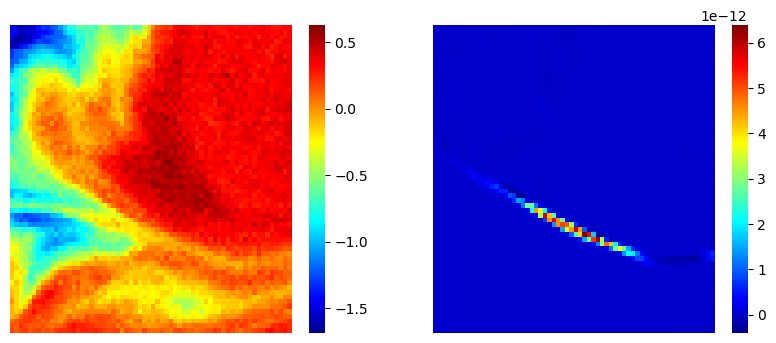

In [13]:
plot_pair(0)

U0=4.045156955718994, U1=8.736286163330078
FS_Npos=76, T=26.296188354492188


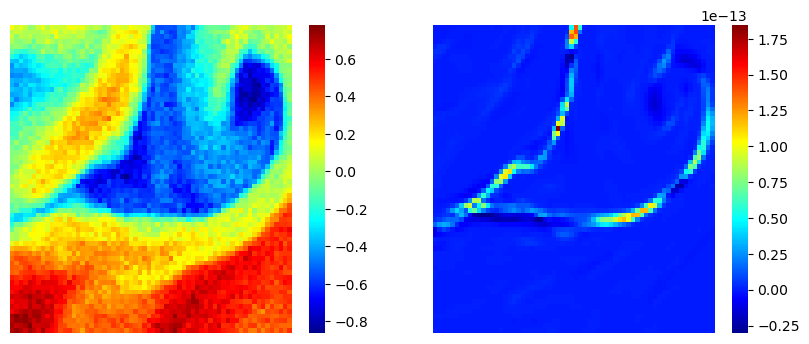

In [15]:
plot_pair(1)

# Grab the LLC data

In [13]:
cutout = sub_tbl.iloc[1]
cutout

lat                                                         18.206642
lon                                                        124.802086
row                                                              8850
col                                                              7782
datetime                                          2012-02-29 00:00:00
filename            /data/Projects/Oceanography/data/LLC/ThetaUVSa...
pp_file                            s3://llc/PreProc/LLC_FS_preproc.h5
pp_root                                                        llc_FS
field_size                                                         64
pp_idx                                                        1342919
pp_type                                                             0
mean_temperature                                            26.296188
Tmin                                                           25.475
Tmax                                                        27.035002
T90                 

## Prep

In [23]:
model = llcreader.ECCOPortalLLC4320Model()
tstep_hr = 144 

In [26]:
all_var = 'Theta,U,V,W,Salt'

In [30]:
iter_step = tstep_hr*1
ds = model.get_dataset(varnames=all_var.split(','),
                           k_levels=[0], type='latlon',
                           iter_step=iter_step)
tsize = ds.time.size

In [31]:
ds.time

<xarray.DataArray 'time' (time: 10312)>
array(['2011-09-13T00:00:00.000000000', '2011-09-13T01:00:00.000000000',
       '2011-09-13T02:00:00.000000000', ..., '2012-11-15T13:00:00.000000000',
       '2012-11-15T14:00:00.000000000', '2012-11-15T15:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-11-15T15:00:00

In [36]:
i_cutout = np.argmin(np.abs(pandas.to_datetime(ds.time.data) - cutout.datetime))
i_cutout

4056

In [37]:
ds.time[i_cutout]

<xarray.DataArray 'time' ()>
array('2012-02-29T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2012-02-29

## Grab -12, -1, +1, +12

In [57]:
for toff in [-12, -1, 0, 1, 12]:
    ds_0 = ds.isel(time=i_cutout+toff, k=0)
    # Outfile
    outroot = '{:s}_{:s}.nc'.format('LLC4320',
            str(ds_0.time.values)[:19].replace(':','_'))
    
    outfile = os.path.join('/home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt',
                           outroot)
    if os.path.isfile(outfile):
        print(f"Skipping: {outfile}")
        continue
    # 
    write_xr(ds_0, outfile)
    print("Wrote: {}".format(outfile))

Skipping: /home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-28T12_00_00.nc
Skipping: /home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-28T23_00_00.nc
Wrote: /home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-29T00_00_00.nc
Skipping: /home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-29T01_00_00.nc
Skipping: /home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-29T12_00_00.nc


## Open em

In [14]:
ds_m1 = xarray.open_dataset('/home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-28T23_00_00.nc')
ds_m12 = xarray.open_dataset('/home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-28T12_00_00.nc')
ds_0 = xarray.open_dataset('/home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-29T00_00_00.nc')
ds_p1 = xarray.open_dataset('/home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-29T01_00_00.nc')
ds_p12 = xarray.open_dataset('/home/xavier/Projects/Oceanography/OGCM/LLC/data/ThetaUVWSalt/LLC4320_2012-02-29T12_00_00.nc')

In [15]:
theta_0 = ds_0.Theta.data[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
theta_m1 = ds_m1.Theta.data[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
theta_m12 = ds_m12.Theta.data[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
theta_p1 = ds_p1.Theta.data[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
theta_p12 = ds_p12.Theta.data[cutout.row:cutout.row+64, cutout.col:cutout.col+64]

# Plot em

In [62]:
def plot_two(i0, i1):
    _, axs = plt.subplots(1,2, figsize=(10,4))
    plotting.show_image(i0, ax=axs[0])
    #
    plotting.show_image(i1, ax=axs[1])
    #
    plt.show()

## -12 hours

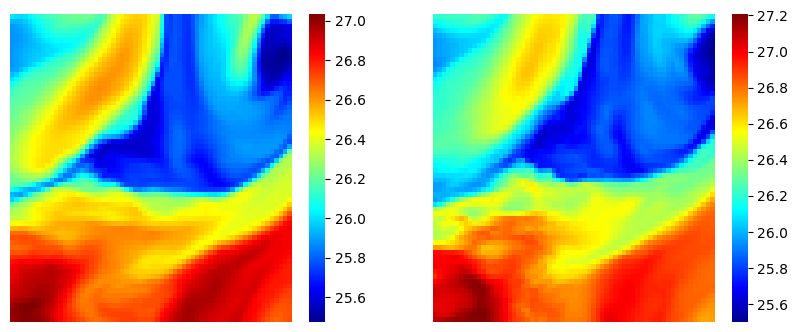

In [63]:
plot_two(theta_0, theta_m12)

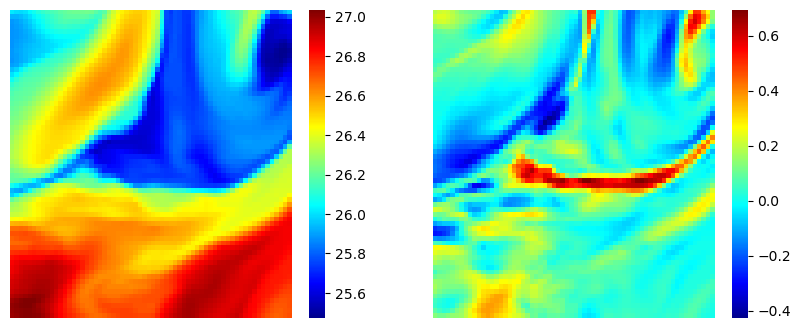

In [64]:
plot_two(theta_0, theta_m12-theta_0)

----

# Images for Peter

In [17]:
F_S = image_utils.grab_image(cutout, close=True,  local_file=local_Fs_file)

In [19]:
images = dict(m12=theta_m12,
              m1=theta_m1,
              zero=theta_0,
              p1=theta_p1,
              p12=theta_p12,
              F_S=F_S)
            

In [25]:
np.savez('images_for_peter', m12=theta_m12,
              m1=theta_m1,
              zero=theta_0,
              p1=theta_p1,
              p12=theta_p12,
              F_S=F_S)